In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
df = pd.read_csv("jobs.csv")

In [3]:
print(df.head())

   Unnamed: 0                    Job Salary Job Experience Required  \
0           0   Not Disclosed by Recruiter               5 - 10 yrs   
1           1   Not Disclosed by Recruiter                2 - 5 yrs   
2           2   Not Disclosed by Recruiter                0 - 1 yrs   
3           3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4           4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawareho

In [4]:
df.isnull().sum()

Unnamed: 0                 0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

In [5]:
df.drop("Unnamed: 0",axis = 1, inplace = True)

EDA Analysis

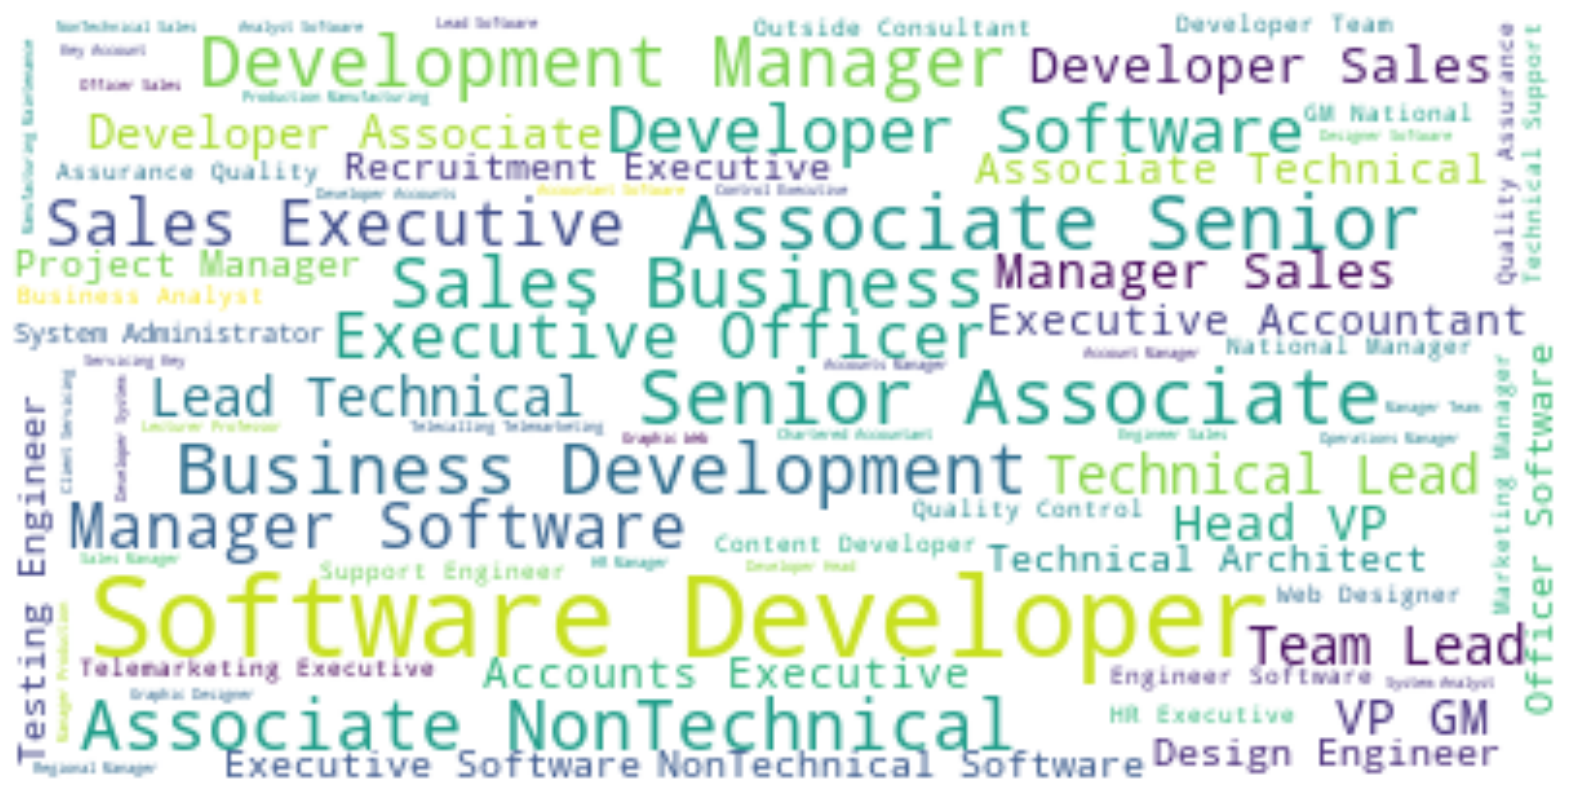

In [6]:
job_title = " ".join(i for i in df["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = "white").generate(job_title)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

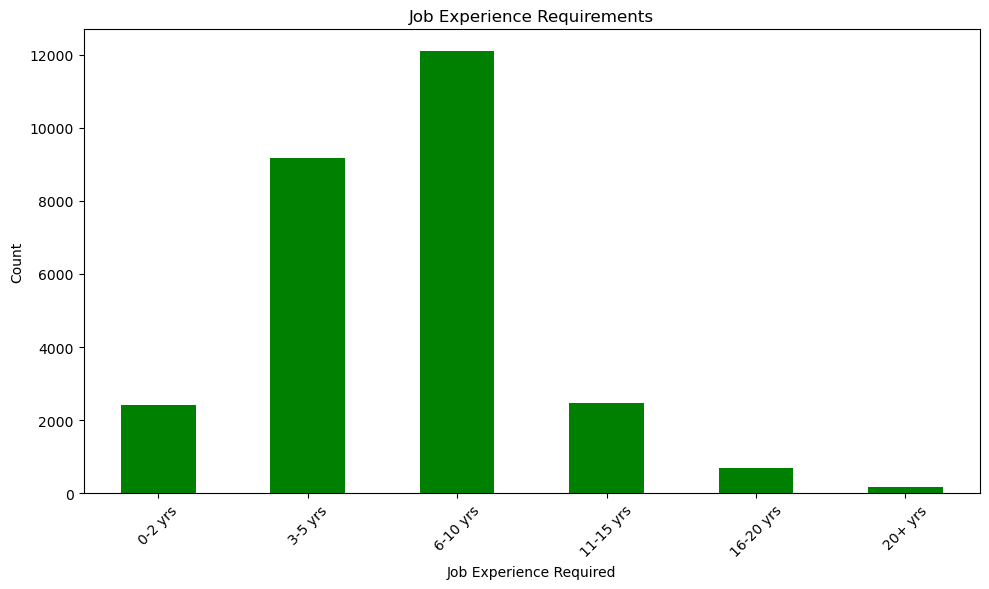

In [7]:
def categorize_experience(experience):
    match = re.match(r'(\d+) - (\d+)', experience)
    if match:
        min_exp, max_exp = int(match.group(1)), int(match.group(2))
        if max_exp <= 2:
            return '0-2 yrs'
        elif max_exp <= 5:
            return '3-5 yrs'
        elif max_exp <= 10:
            return '6-10 yrs'
        elif max_exp <= 15:
            return '11-15 yrs'
        elif max_exp <= 20:
            return '16-20 yrs'
        else:
            return '20+ yrs'
    return 'Uncategorized'

df['Experience Category'] = df['Job Experience Required'].apply(categorize_experience)

experience_counts = df['Experience Category'].value_counts()

category_order = ['0-2 yrs', '3-5 yrs', '6-10 yrs', '11-15 yrs', '16-20 yrs', '20+ yrs']

experience_counts_sorted = experience_counts.reindex(category_order)

plt.figure(figsize=(10, 6))
experience_counts_sorted.plot(kind='bar', color='green')
plt.xlabel('Job Experience Required')
plt.ylabel('Count')
plt.title('Job Experience Requirements')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()

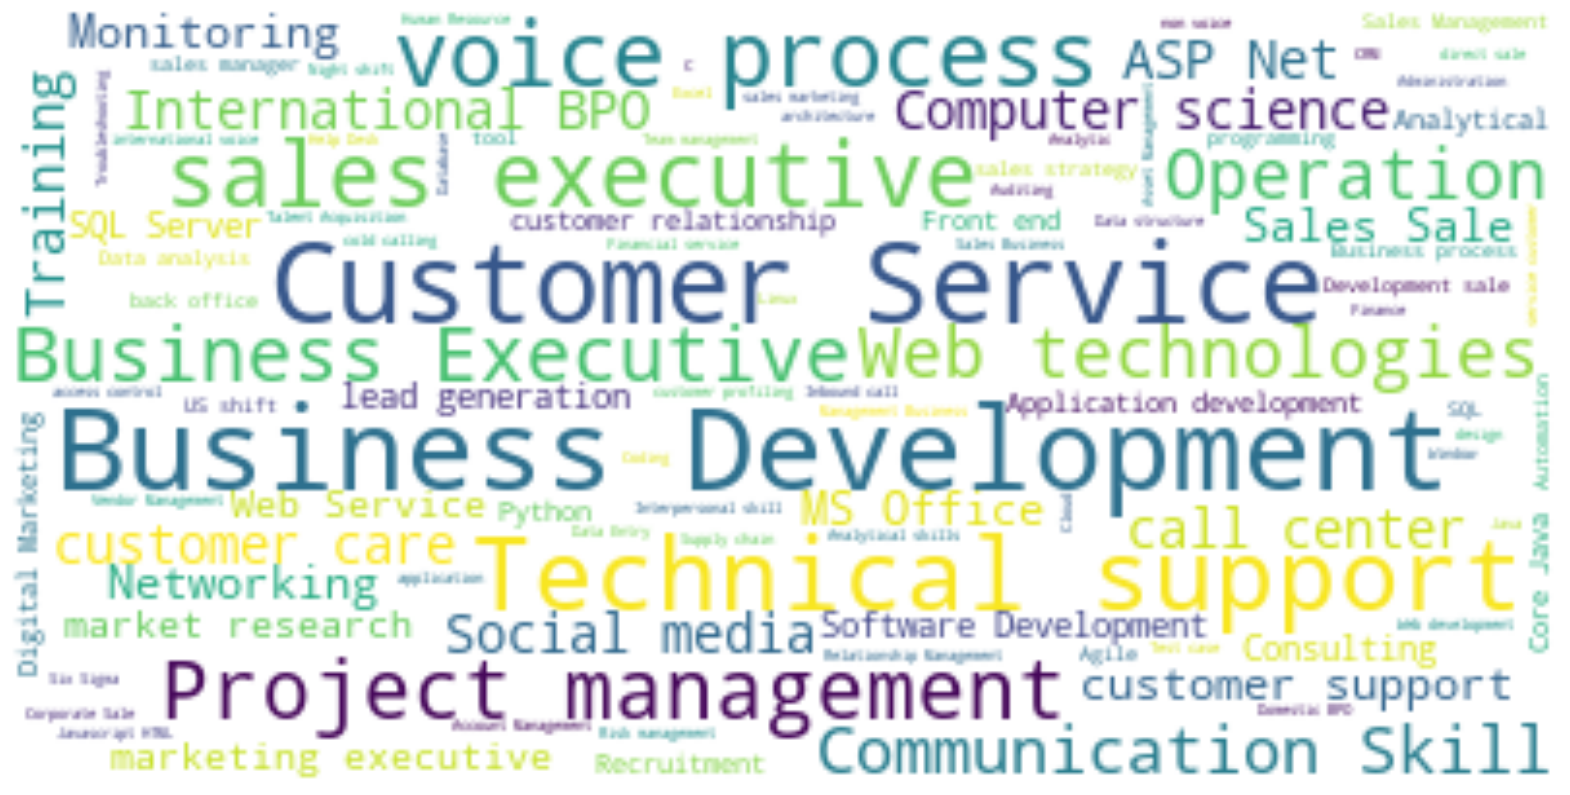

In [8]:
text = " ".join(i for i in df["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = "white").generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

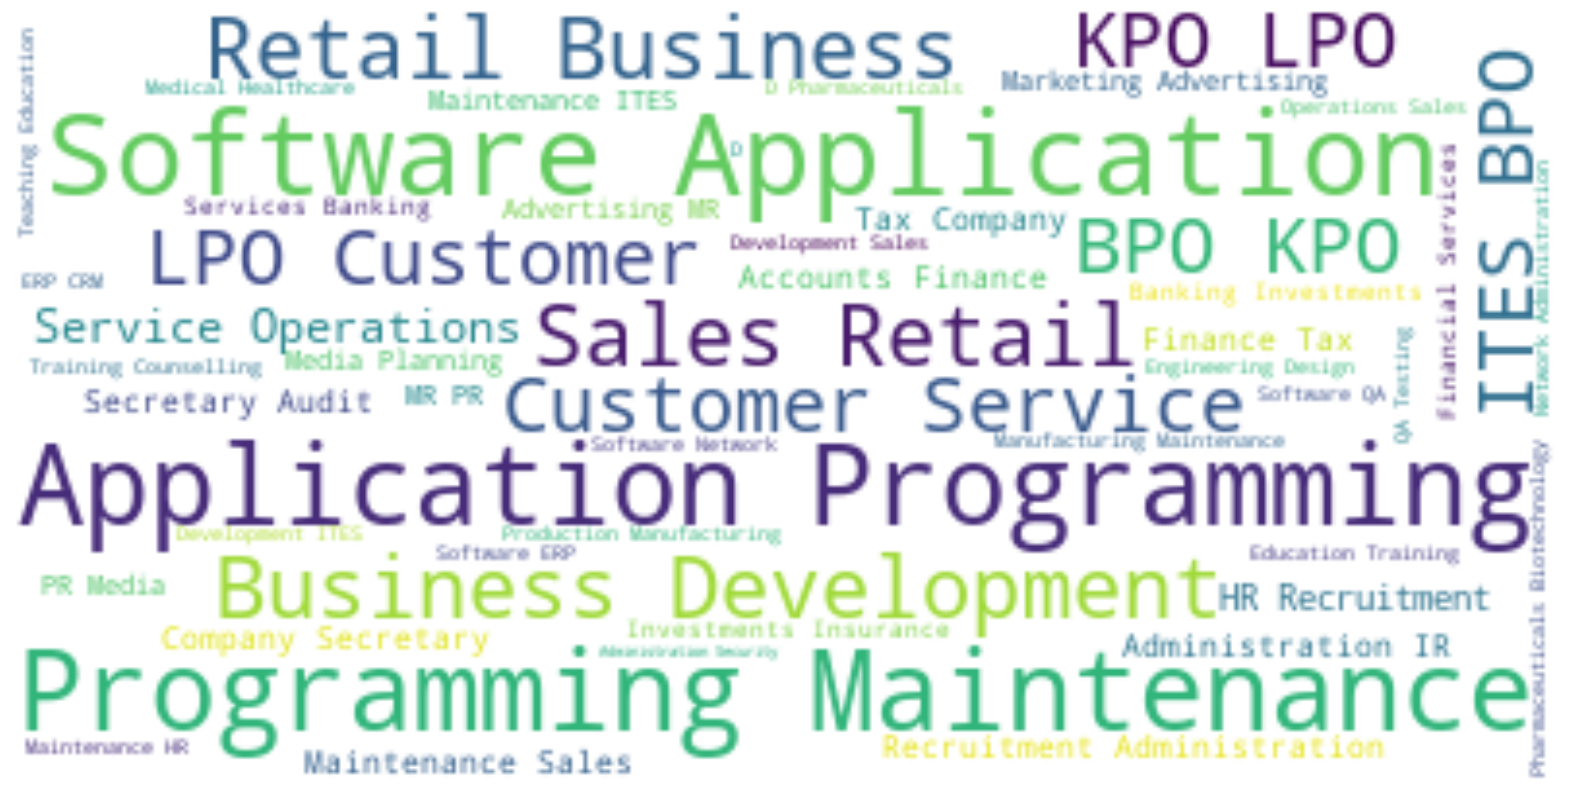

In [9]:
fun_area = " ".join(i for i in df["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = "white").generate(fun_area)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Recommends a job analyzing the Key skills

In [10]:
from sklearn.feature_extraction import text
feature = df["Key Skills"].tolist()
tf = text.TfidfVectorizer(input=feature, stop_words = "english")
tf_matrix = tf.fit_transform(feature)
similarity = cosine_similarity(tf_matrix)

Frequency of Unique Words in the "Key Skills" Column accross the document (top 15)

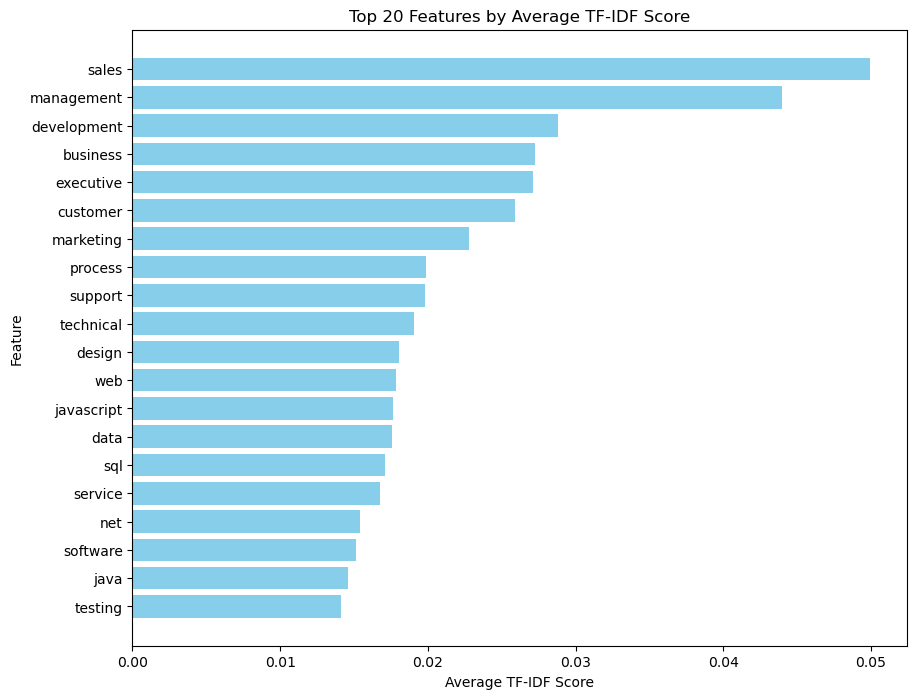

In [12]:
feature_names = np.array(tf.get_feature_names_out())
avg_tfidf = np.asarray(tf_matrix.mean(axis=0)).flatten()

sorted_indices = avg_tfidf.argsort()[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_tfidf_scores = avg_tfidf[sorted_indices]

top_n = 20
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names[:top_n], sorted_tfidf_scores[:top_n], color='skyblue')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Features by Average TF-IDF Score')
plt.gca().invert_yaxis()
plt.show()

In [13]:
indices = pd.Series(df.index, index = df["Job Title"]).drop_duplicates()

In [14]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse = True)
    similarity_scores = similarity_scores[0:5]
    newindices = [i[0] for i in similarity_scores]
    return df[['Job Title', 'Job Experience Required', 'Key Skills']].iloc[newindices]

print(jobs_recommendation("Software Developer"))

                                       Job Title Job Experience Required  \
6249          Sales/Business Development Manager               4 - 5 yrs   
6248                          Software Developer               2 - 5 yrs   
6247  Associate/Senior Associate -(NonTechnical)              5 - 10 yrs   
6246                          Software Developer               1 - 6 yrs   
6245  Associate/Senior Associate -(NonTechnical)               1 - 4 yrs   

                                             Key Skills  
6249   Networking| Printing| Aerospace| Raw material...  
6248   PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...  
6247   Data analysis| Investment banking| Financial ...  
6246   Coding| Wordpress| Commerce| HTML| Troublesho...  
6245   client servicing| client support| background ...  


Recommends the Job analyzing the Industry interested in

In [18]:
from sklearn.feature_extraction import text
feature = df["Role Category"].tolist()
tf = text.TfidfVectorizer(input=feature, stop_words = "english")
tf_matrix = tf.fit_transform(feature)
similarity = cosine_similarity(tf_matrix)

In [20]:
def industry_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse = True)
    similarity_scores = similarity_scores[0:5]
    newindices = [i[0] for i in similarity_scores]
    return df[['Job Title', 'Industry']].iloc[newindices]

print(industry_recommendation("Webmaster"))

                                     Job Title  \
50          Sales/Business Development Manager   
49                           Content Developer   
48                 Team Leader -(NonTechnical)   
47                          Software Developer   
46  Associate/Senior Associate -(NonTechnical)   

                             Industry  
50  Aviation, Aerospace, Aeronautical  
49     Media, Entertainment, Internet  
48             BPO, Call Centre, ITeS  
47     IT-Software, Software Services  
46             BPO, Call Centre, ITeS  


Job Recommendation Analyzing Job Experience Required, Key Skills, Functional Area, Industry, Job Title

In [21]:
columns_to_combine = ['Job Experience Required', 'Key Skills', 'Functional Area', 'Industry', 'Job Title']
df['Combined Features'] = df[columns_to_combine].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

tf = text.TfidfVectorizer(stop_words = "english")
tf_matrix = tf.fit_transform(df['Combined Features'])
similarity = cosine_similarity(tf_matrix)

In [30]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse = True)
    similarity_scores = similarity_scores[0:5]
    newindices = [i[0] for i in similarity_scores]
    return df[['Job Title', 'Job Experience Required','Industry', 'Key Skills']].iloc[newindices]

print(jobs_recommendation("Lecturer/Professor"))

                                      Job Title Job Experience Required  \
182                          Software Developer               3 - 5 yrs   
181  Associate/Senior Associate -(NonTechnical)               1 - 4 yrs   
180                            Accounts Manager              7 - 12 yrs   
179                    Head/VP/GM-Finance/Audit             12 - 17 yrs   
178    Executive/ Sr Executive - Administration               2 - 5 yrs   

                           Industry  \
182  Medical, Healthcare, Hospitals   
181          BPO, Call Centre, ITeS   
180  IT-Software, Software Services   
179           Recruitment, Staffing   
178  IT-Software, Software Services   

                                            Key Skills  
182   Change management| Healthcare| Analyst| Busin...  
181                   accounts payable| accounting| AP  
180   Balance Sheet Finalisation| service tax| bank...  
179   Credit Officers| Risk Management| Administrat...  
178   English| MS Office| adm